In [109]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use("seaborn")

## Loading data

In [3]:
df_projects = pd.read_csv('dataset/salicapi-projetos-b7d218c49fac0a1020948bb1230aabfc.csv', parse_dates=['data_inicio', 'data_termino'])

In [202]:
df_projects.count()

etapa                    100
providencia              100
area                     100
enquadramento            100
objetivos                100
ficha_tecnica            100
situacao                 100
outras_fontes            100
acessibilidade           100
sinopse                   93
nome                     100
cgccpf                   100
mecanismo                100
segmento                 100
PRONAC                   100
estrategia_execucao       65
valor_aprovado           100
justificativa            100
resumo                   100
valor_solicitado         100
especificacao_tecnica     88
municipio                100
data_termino             100
UF                       100
impacto_ambiental         13
democratizacao           100
valor_projeto            100
proponente               100
ano_projeto              100
data_inicio              100
valor_captado            100
valor_proposta           100
dtype: int64

In [5]:
df_projects.dtypes

etapa                            object
providencia                      object
area                             object
enquadramento                    object
objetivos                        object
ficha_tecnica                    object
situacao                         object
outras_fontes                   float64
acessibilidade                   object
sinopse                          object
nome                             object
cgccpf                           object
mecanismo                        object
segmento                         object
PRONAC                            int64
estrategia_execucao              object
valor_aprovado                  float64
justificativa                    object
resumo                           object
valor_solicitado                float64
especificacao_tecnica            object
municipio                        object
data_termino             datetime64[ns]
UF                               object
impacto_ambiental                object


In [6]:
df_projects_v2 = df_projects.drop(['etapa', 'providencia', 'objetivos', 'ficha_tecnica', 'acessibilidade', 'sinopse', 'nome',
                'cgccpf', 'mecanismo', 'PRONAC', 'estrategia_execucao', 'justificativa', 'resumo', 
                 'especificacao_tecnica', 'impacto_ambiental', 'democratizacao'], axis=1)

In [187]:
df_projects_v2.head()

,area,enquadramento,situacao,outras_fontes,segmento,valor_aprovado,valor_solicitado,municipio,data_termino,UF,valor_projeto,proponente,ano_projeto,data_inicio,valor_captado,valor_proposta
data_inicio,,,,,,,,,,,,,,,,
2018-11-01,Humanidades,Artigo 18,Expirado o prazo de captação total,0.0,Livros ou obras de referência - valor Artístico,601401.02,601401.02,Petrópolis,2018-11-30,RJ,601401.02,LEONARDO CERQUEIRA DE OLIVEIRA,18,2018-11-01,0.0,601401.02
2019-01-01,Artes Visuais,Artigo 18,Autorizada a captação total dos recursos,0.0,Exposição de Artes Visuais,2300833.20,2300833.20,Rio de Janeiro,2019-12-31,RJ,2300833.20,ASSOCIACAO DE AMIGOS DO PACO IMPERIAL,18,2019-01-01,0.0,2300833.20
2019-01-01,Artes Visuais,Artigo 18,Autorizada a captação total dos recursos,0.0,Exposição de Artes Visuais,646108.80,646108.80,Ribeirão Preto,2020-01-31,SP,646108.80,INSTITUTO FIGUEIREDO FERRAZ,18,2019-01-01,0.0,646108.80
2019-01-01,Música,Artigo 18,Autorizada a captação total dos recursos,0.0,Canto Coral,695075.70,695075.70,Recife,2019-12-31,PE,695075.70,Movimeto Pró-Criança,18,2019-01-01,0.0,695075.70
2019-01-01,Humanidades,Artigo 18,Autorizada a captação total dos recursos,0.0,Livros ou obras de referência - valor Humanís...,298856.25,298856.25,Porto Alegre,2019-12-31,RS,298856.25,NUBIA SALETTE MARQUES SILVEIRA ME,18,2019-01-01,0.0,298856.25


## Exploring the dataset

Text(0.5, 1.0, 'Nº of projects by area')

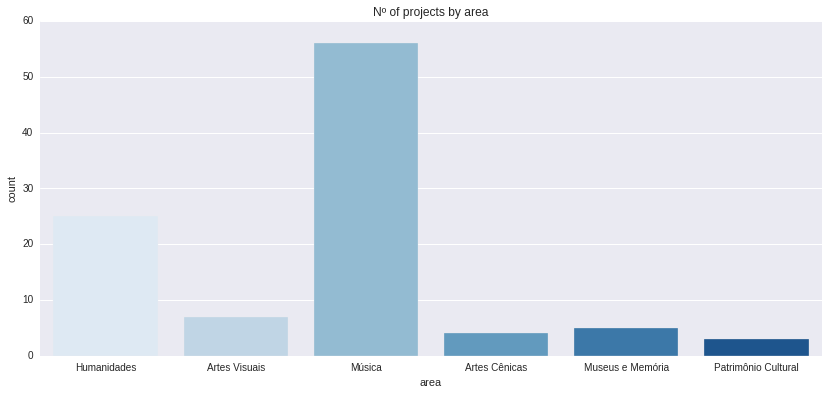

In [189]:
plt.subplots(figsize=(14, 6))
sns.countplot(x = "area", data = df_projects_v2, palette = "Blues");
plt.title('Nº of projects by area')

Text(0.5, 1.0, 'Nº of projects by segment')

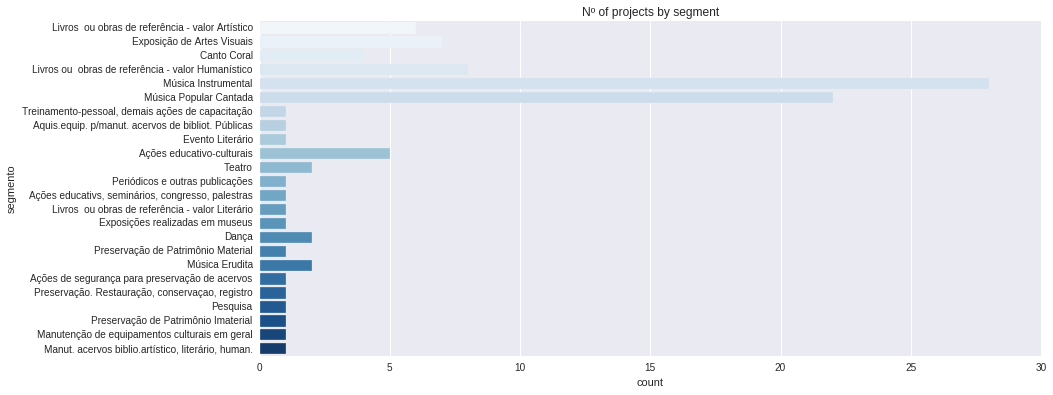

In [190]:
plt.subplots(figsize=(14, 6))
sns.countplot(y = "segmento", data = df_projects_v2, palette = "Blues");
plt.title('Nº of projects by segment')

Text(0.5, 1.0, 'Nº of projects by situation')

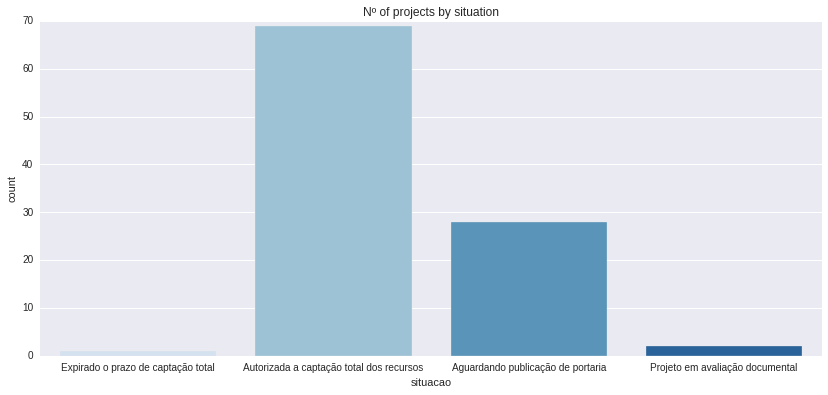

In [191]:
plt.subplots(figsize=(14, 6))
sns.countplot(x = "situacao", data = df_projects_v2, palette = "Blues");
plt.title('Nº of projects by situation')

Text(0.5, 1.0, 'Value of Approved value, Requested value and Project value in Reais (R$)')

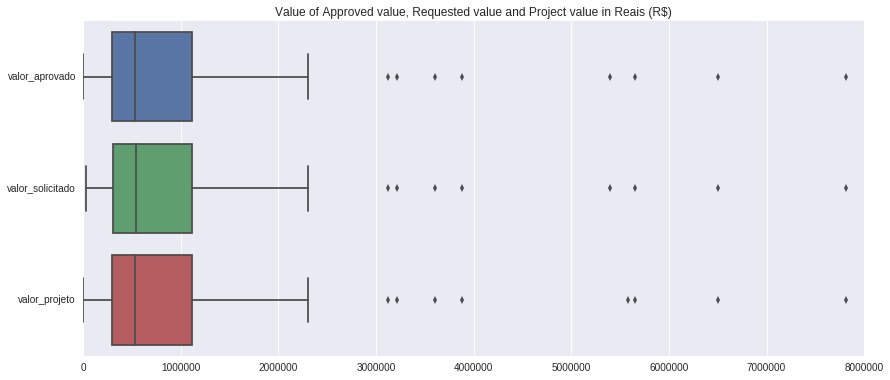

In [192]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data = df_projects_v2[['valor_aprovado', 'valor_solicitado', 'valor_projeto']], orient = "h");
plt.title('Value of Approved value, Requested value and Project value in Reais (R$)')

Text(0.5, 1.0, 'Value (R$) of approved projects per state')

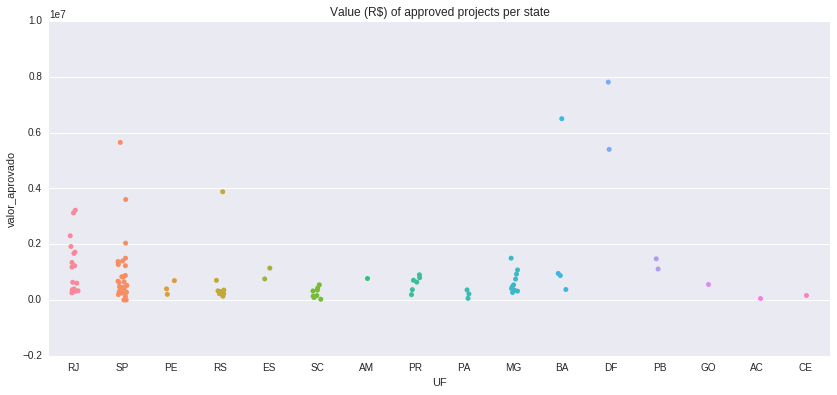

In [196]:
plt.subplots(figsize=(14, 6))
sns.stripplot(x = "UF", y = "valor_aprovado", data = df_projects_v2,);
plt.title('Value (R$) of approved projects per state')

Text(0.5, 1.0, 'Value (R$) of approved projects by area')

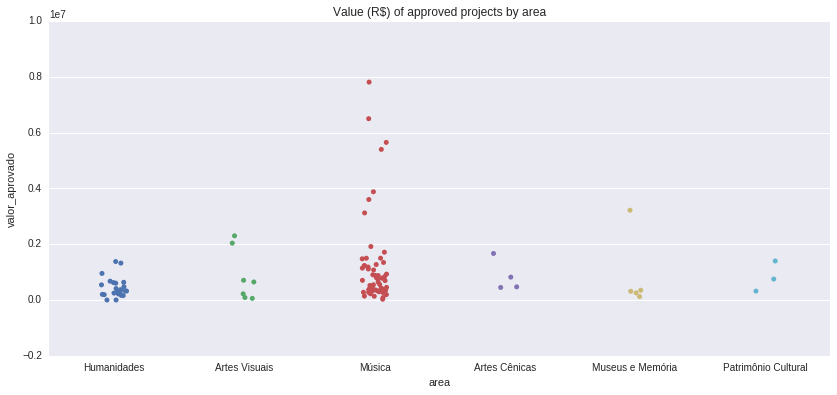

In [201]:
plt.subplots(figsize=(14, 6))
sns.stripplot(x = "area", y = "valor_aprovado", data = df_projects_v2,);
plt.title('Value (R$) of approved projects by area')

In [61]:
df_projects_v2.index = df_projects_v2['data_inicio'].sort_index(axis=0, ascending=True)

Text(0.5, 1.0, 'Value (R$) of approved projects over time')

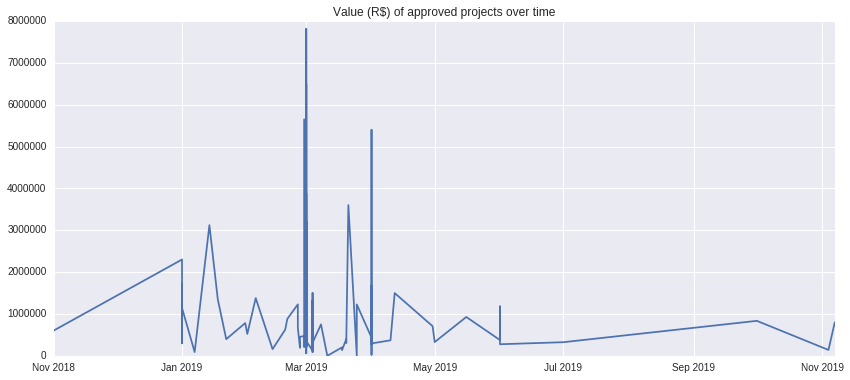

In [198]:
plt.subplots(figsize=(14, 6))
plt.plot(df_projects_v2.index,df_projects_v2['valor_aprovado'])
plt.title('Value (R$) of approved projects over time')

Text(0.5, 1.0, 'Combined plots')

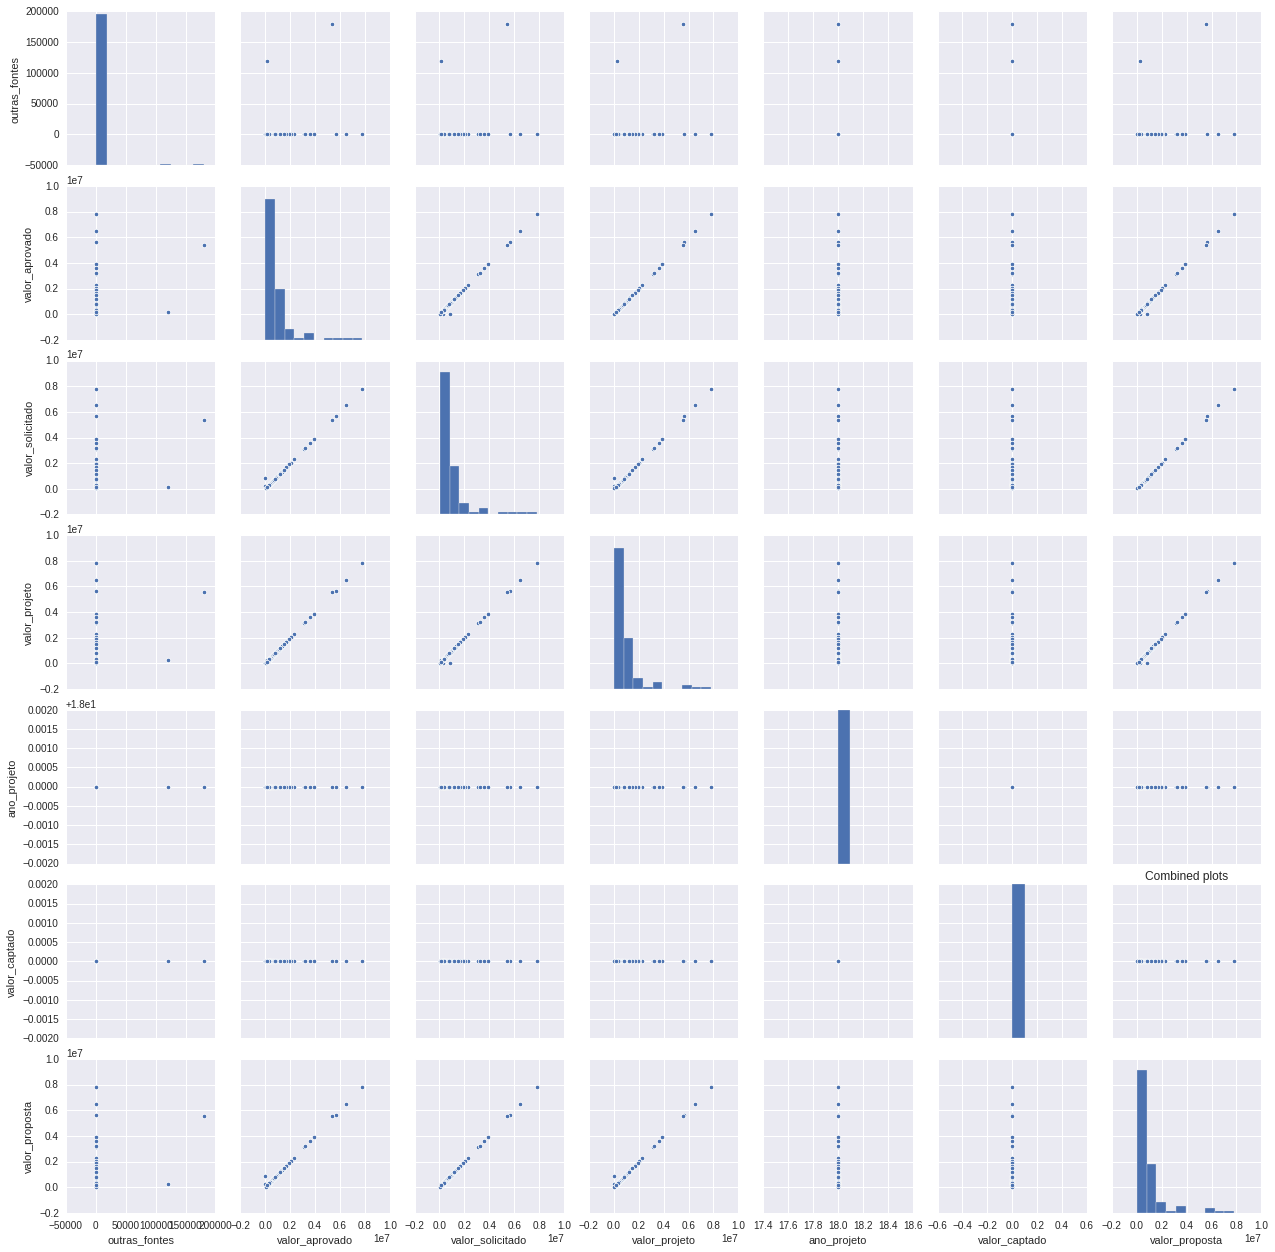

In [200]:
sns.pairplot(df_projects_v2);